In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import os
from typing import Dict
import pickle
from scipy.stats import linregress


def set_default_plot_style():
    plt.style.use("default")  # start clean

    plt.rcParams["axes.grid"] = True
    plt.rcParams["grid.alpha"] = 0.2
    plt.rcParams["grid.linestyle"] = "-"
    plt.rcParams["grid.color"] = "gray"

    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False

    plt.rcParams["axes.linewidth"] = 1.2

    plt.rcParams["legend.frameon"] = False

    plt.rcParams["font.size"] = 16
    plt.rcParams["axes.labelsize"] = 24
    plt.rcParams["legend.fontsize"] = 18

    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']

# Call once at the top of your script
set_default_plot_style()


In [2]:
# Helpful funcs
def log_b(x, b):
    return np.log(x) / np.log(b)


In [3]:
L_vals = [4000, 8000, 16000]

epdilon_vals = [0.29451]

time_prefact = 10000

num_initial_conds = 4000
initial_state_prob = 0.5

time_step = 100000

cmap = plt.colormaps.get_cmap("Oranges").resampled(len(epdilon_vals) + 5)
cmap2 = plt.colormaps.get_cmap("Blues").resampled(len(L_vals) + 5)


read_external_drive = True
write_external_drive = read_external_drive and True
local_data_parent_folder = "data"
if read_external_drive:
    data_parent_folder = "/Volumes/ExternalData/stavskya_mc/data"
    if write_external_drive:
        local_data_parent_folder = "/Volumes/ExternalData/stavskya_mc/data"
else:
    data_parent_folder = local_data_parent_folder


In [10]:
# If first time

collected_rhos = {}
collected_rho_stds = {}

for L_val in L_vals:
    print(f"L_val: {L_val}")

    T_f = L_val*time_prefact
    collected_rhos[L_val] = {}
    collected_rho_stds[L_val] = {}

    for epdilon in epdilon_vals:
        print(f"L_val: {L_val} | epsilon: {epdilon}")
        epsilon_val_name = f"{epdilon}".replace(".", "p")

        current_rhos = np.array([[0.0 for _ in range(L_val * time_prefact // time_step)] for _ in range(num_initial_conds)])
        for init_cond in range(1, num_initial_conds+1):
            sample_filepath_name = os.path.join(data_parent_folder, f"rho_per_time/IC1/L{L_val}/IC1_L{L_val}_epsilon{epsilon_val_name}_timepref{time_prefact}_sample{init_cond}.csv")
            try:
                df = pd.read_csv(sample_filepath_name)

                current_rhos[init_cond-1] = df.rho
            except Exception as e:
                print(e)
                print(sample_filepath_name)
        
        collected_rhos[L_val][epdilon] = np.mean(current_rhos.T, axis=1)
        collected_rho_stds[L_val][epdilon] = np.std(current_rhos.T, axis=1)

        pickle_path = os.path.join(local_data_parent_folder, f"rho_per_time/IC{num_initial_conds}/L{L_val}/IC{num_initial_conds}_L{L_val}_epsilon{epsilon_val_name}_timepref{time_prefact}_timestep{time_step}")
        dir_path = os.path.dirname(pickle_path)
        os.makedirs(dir_path, exist_ok=True)
        
        with open(pickle_path + "mean.pickle", "wb") as f:
            pickle.dump(collected_rhos[L_val][epdilon], f)
        with open(pickle_path + "stds.pickle", "wb") as f:
            pickle.dump(collected_rho_stds[L_val][epdilon], f)

L_val: 4000
L_val: 4000 | epsilon: 0.29451
L_val: 8000
L_val: 8000 | epsilon: 0.29451
L_val: 16000
L_val: 16000 | epsilon: 0.29451


In [4]:

collected_rhos = {}
collected_rho_stds = {}

for L_val in L_vals:
    print(f"L_val: {L_val}")

    T_f = L_val*time_prefact
    collected_rhos[L_val] = {}
    collected_rho_stds[L_val] = {}

    collected_rhos[L_val] = {}
    collected_rho_stds[L_val] = {}
    for epdilon in epdilon_vals:
        epsilon_val_name = f"{epdilon}".replace(".", "p")
        pickle_path = os.path.join(local_data_parent_folder, f"rho_per_time/IC{num_initial_conds}/L{L_val}/IC{num_initial_conds}_L{L_val}_epsilon{epsilon_val_name}_timepref{time_prefact}_timestep{time_step}")
        
        with open(pickle_path + "mean.pickle", "rb") as f:
            collected_rhos[L_val][epdilon] = pickle.load(f)
        with open(pickle_path + "stds.pickle", "rb") as f:
            collected_rho_stds[L_val][epdilon] = pickle.load(f)

L_val: 4000
L_val: 8000
L_val: 16000


/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_6230/3192954932.py:11: RuntimeWarning: divide by zero encountered in log10
  np.log10((time_vals/(L ** z_guess)))[5::],
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_6230/3192954932.py:12: RuntimeWarning: divide by zero encountered in log10
  np.log10((orig_data * time_vals ** found_delta))[5::],


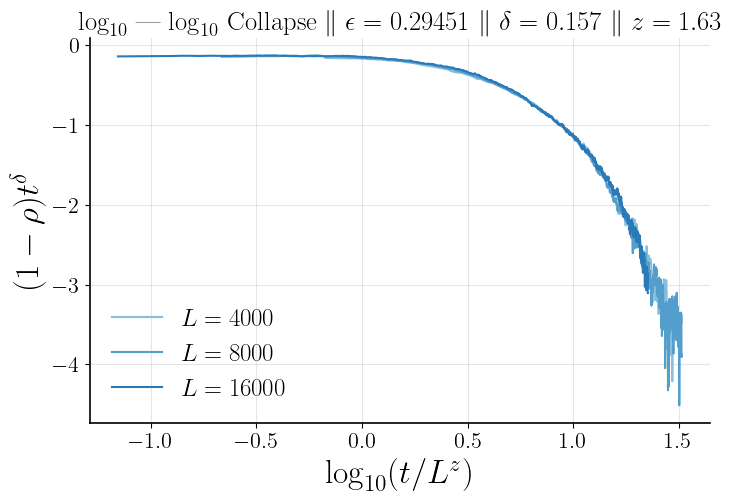

In [10]:
epsilon_c = 0.29451
z_guess = 1.63
found_delta = 0.157

plt.figure(figsize=(8,5))
for j, L in enumerate(L_vals):
    c = cmap2(j+3)
    time_vals = np.array([i * time_step for i in range(0, L*time_prefact // time_step)])
    orig_data = 1-collected_rhos[L][epsilon_c]
    plt.plot(
        np.log10((time_vals/(L ** z_guess)))[5::], 
        np.log10((orig_data * time_vals ** found_delta))[5::], 
        label = fr"$L = {L}$",
        # fmt='--',  
        # markersize=3,
        # marker = "o",
        # capsize=3,
        c=c
        )

# plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
plt.title(fr"$\log_{{10}}$ | $\log_{{10}}$ Collapse $\|$ $\epsilon = {epsilon_c}$ $\|$ $\delta = {found_delta}$ $\|$ $z = {z_guess}$")
plt.xlabel(r"$\log_{10}(t/L^z)$")
plt.ylabel(r"$(1 - \rho)t^\delta$")
plt.legend()
# plt.xlim(np.log10(0.001), np.log10(1))
# plt.ylim(0.7, 0.77)

plt.show()

/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_6230/4282136527.py:11: RuntimeWarning: divide by zero encountered in log10
  np.log10(time_vals)[1::],
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_6230/4282136527.py:12: RuntimeWarning: divide by zero encountered in log10
  np.log10((orig_data))[1::],


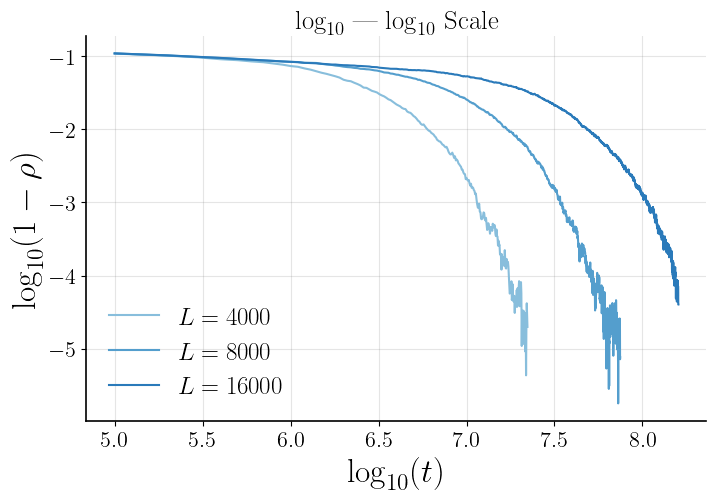

In [9]:
epsilon_c = 0.29451
z_guess = 1.6
found_delta = 0.154

plt.figure(figsize=(8,5))
for j, L in enumerate(L_vals):
    c = cmap2(j+3)
    time_vals = np.array([i * time_step for i in range(0, L*time_prefact // time_step)])
    orig_data = 1-collected_rhos[L][epsilon_c]
    plt.plot(
        np.log10(time_vals)[1::], 
        np.log10((orig_data))[1::], 
        label = fr"$L = {L}$",
        # fmt='--',  
        # markersize=3,
        # marker = "o",
        # capsize=3,
        c=c
        )

# plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
plt.title(fr"$\log_{{10}}$ | $\log_{{10}}$ Scale")
plt.xlabel(r"$\log_{10}(t)$")
plt.ylabel(r"$\log_{10}(1 - \rho)$")
plt.legend()
# plt.xlim(np.log10(0.001), np.log10(1))
# plt.ylim(0.7, 0.77)

plt.show()

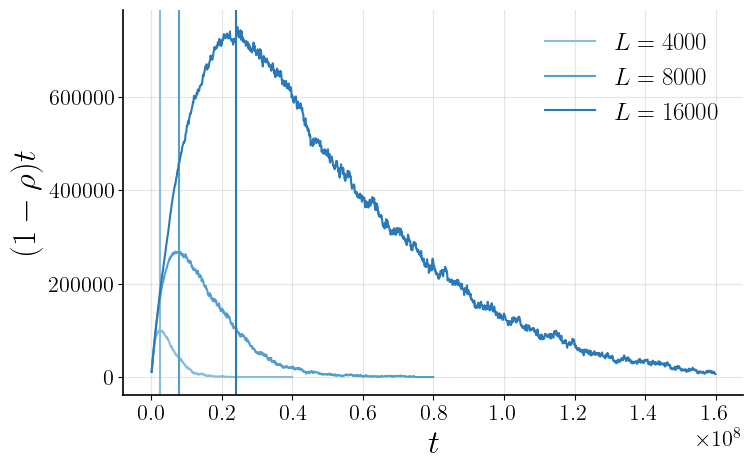

In [14]:
epsilon_c = 0.29451
z_guess = 1.66
found_delta = 0.157

C = 4.5

plt.figure(figsize=(8,5))
for j, L in enumerate(L_vals):
    c = cmap2(j+3)
    time_vals = np.array([i * time_step for i in range(0, L*time_prefact // time_step)])
    orig_data = 1-collected_rhos[L][epsilon_c]
    plt.plot(
        (time_vals)[1::], 
        (orig_data * time_vals)[1::], 
        label = fr"$L = {L}$",
        # fmt='--',  
        # markersize=3,
        # marker = "o",
        # capsize=3,
        c=c
        )
    plt.axvline(C * L ** 1.6, c=c)

# plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
plt.xlabel(r"$t$")
plt.ylabel(r"$(1 - \rho)t$")
plt.legend()
# plt.xlim(np.log10(0.001), np.log10(1))
# plt.ylim(0.7, 0.77)

plt.show()

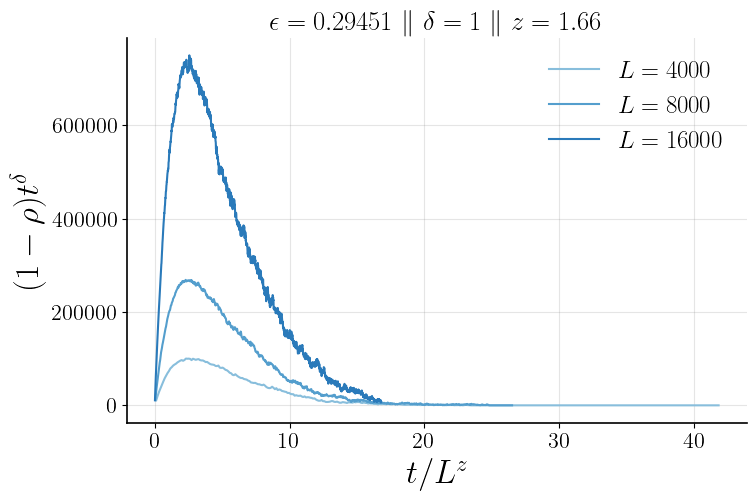

In [8]:
epsilon_c = 0.29451
z_guess = 1.66
found_delta = 1

plt.figure(figsize=(8,5))
for j, L in enumerate(L_vals):
    c = cmap2(j+3)
    time_vals = np.array([i * time_step for i in range(0, L*time_prefact // time_step)])
    orig_data = 1-collected_rhos[L][epsilon_c]
    plt.plot(
        (time_vals / (L**z_guess))[1::], 
        (orig_data * time_vals ** found_delta)[1::], 
        label = fr"$L = {L}$",
        # fmt='--',  
        # markersize=3,
        # marker = "o",
        # capsize=3,
        c=c
        )

# plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
plt.title(fr"$\epsilon = {epsilon_c}$ $\|$ $\delta = {found_delta}$ $\|$ $z = {z_guess}$")
plt.xlabel(r"$t/L^z$")
plt.ylabel(r"$(1 - \rho)t^\delta$")
plt.legend()
# plt.xlim(np.log10(0.001), np.log10(1))
# plt.ylim(0.7, 0.77)

plt.show()